In [1]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#statistic
from scipy import stats
from scipy.stats import norm
import statistics as st

In [2]:
# open dataset
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### 1. Untuk feature/column Landsize, Distance, & Price, hitung dan beri penjelasan (insight) terkait: Titik Pusat Data (Central Tendency), Persebaran Data (Dispersion) dan Distribusi Data (Distribution).

## Central Tendency

In [3]:
print("Mean Landsize =", df['Landsize'].describe().mean())
print("Median Landsize =", df['Landsize'].median())
print("Modus Landsize =", df['Landsize'].mode()[0])

Mean Landsize = 56551.38567097073
Median Landsize = 440.0
Modus Landsize = 0.0


#### Nilai tengah Landsize terletak di angka 440 dan memiliki rata-rata 56551. Tidak ada modus karena jumlah data angka yang paling banyak muncul lebih dari 1.

In [4]:
print("Mean Distance =", df['Distance'].describe().mean())
print("Median Distance =", df['Distance'].median())
print("Modus Distance =", df['Distance'].mode()[0])

Mean Distance = 1709.0508126355571
Median Distance = 9.2
Modus Distance = 11.2


#### Nilai tengah Distance terletak di angka 9.2 dan memiliki rata-rata 1709. Angka paling banyak muncul ialah 11.2.

In [5]:
print("Mean Price =", df['Price'].describe().mean())
print("Median Price =", df['Price'].median())
print("Modus Price =", df['Price'].mode()[0])

Mean Price = 1712071.8504688875
Median Price = 903000.0
Modus Price = 1100000.0


#### Nilai tengah Price terletak di angka 903.000 dan memiliki rata-rata 1.712.071. Angka paling banyak muncul ialah 1.100.000.

## Dispersion

In [6]:
print("Standar Deviasi Landsize =", df['Landsize'].std())
print("Standar Deviasi Distance =", df['Distance'].std())
print("Standar Deviasi Price =", df['Price'].std())

Standar Deviasi Landsize = 3990.6692411090344
Standar Deviasi Distance = 5.868724943071692
Standar Deviasi Price = 639310.7242960194


In [7]:
print("Variance Landsize =", st.variance(df['Landsize']))
print("Variance Distance =", st.variance(df['Distance']))
print("Variance Price =", st.variance(df['Price']))

Variance Landsize = 15925440.991933739
Variance Distance = 34.44193245743205
Variance Price = 408718202199.8992


## Distribution

### Distribusi Landsize, Distance, dan Price tidak terdistribusi normal karena memiliki skewness lebih dari 1 dan p value normal test tidak lebih dari 0.05.

In [8]:
print("Skew Landsize =", df['Landsize'].skew())
print("Skew Distance =", df['Distance'].skew())
print("Skew Price =", df['Price'].skew())

Skew Landsize = 95.23740045101685
Skew Distance = 1.6769370831513803
Skew Price = 2.239624312529873


In [9]:
h = df['Landsize']
k1, p1 = stats.normaltest(h)
alpha = 0.05
print(f"p = {p1}")

if p1 > alpha:
    print("Terdistribusi normal")
else:
    print("Tidak terdistribusi normal")

p = 0.0
Tidak terdistribusi normal


In [10]:
h = df['Distance']
k1, p1 = stats.normaltest(h)
alpha = 0.05
print(f"p = {p1}")

if p1 > alpha:
    print("Terdistribusi normal")
else:
    print("Tidak terdistribusi normal")

p = 0.0
Tidak terdistribusi normal


In [11]:
h = df['Price']
k1, p1 = stats.normaltest(h)
alpha = 0.05
print(f"p = {p1}")

if p1 > alpha:
    print("Terdistribusi normal")
else:
    print("Tidak terdistribusi normal")

p = 0.0
Tidak terdistribusi normal


### 2. Carilah data outlier dan beri penjelasan (insight) pada feature/column Landsize & Distance ! Tambahkan plot untuk menampilkan adanya data outlier!

In [12]:
def find_outlier(yourList):
    q1 = yourList.describe()['25%']
    q2 = yourList.describe()['50%']
    q3 = yourList.describe()['75%']
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr
    outlier = []
    for i in yourList:
        if i < batas_bawah or i > batas_atas:
            outlier.append(i)
    return outlier

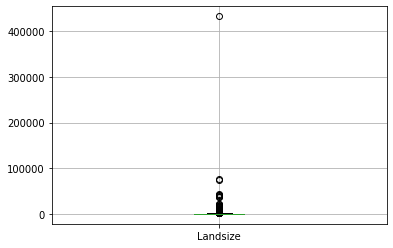

Median = 440.0
IQR = 474.0
Jumlah Outlier = 368
Outlier = [4290.0, 1581.0, 2113.0, 1491.0, 2471.0, 1957.0, 1472.0, 1801.0, 2051.0, 1468.0, 1437.0, 1611.0, 1364.0, 75100.0, 4931.0, 1572.0, 1561.0, 4668.0, 4676.0, 2120.0, 1393.0, 2886.0, 15900.0, 2773.0, 3701.0, 1777.0, 1484.0, 1764.0, 1966.0, 2381.0, 2925.0, 1622.0, 1547.0, 10100.0, 1658.0, 2782.0, 4332.0, 2778.0, 4296.0, 4296.0, 4296.0, 2077.0, 2794.0, 8680.0, 1783.0, 1485.0, 3056.0, 1996.0, 1402.0, 1504.0, 3414.0, 1585.0, 1997.0, 3132.0, 1568.0, 3194.0, 3977.0, 4267.0, 4440.0, 3448.0, 3957.0, 2136.0, 1972.0, 15100.0, 5661.0, 3967.0, 1396.0, 37000.0, 4977.0, 3014.0, 3014.0, 4230.0, 1414.0, 4051.0, 1751.0, 1388.0, 2026.0, 2187.0, 1981.0, 1660.0, 2522.0, 1588.0, 2300.0, 1882.0, 1390.0, 2469.0, 2427.0, 2488.0, 2431.0, 2401.0, 2193.0, 21700.0, 2166.0, 2166.0, 2166.0, 6866.0, 5042.0, 1768.0, 1958.0, 8216.0, 3037.0, 1485.0, 4679.0, 41400.0, 8223.0, 1725.0, 2571.0, 2740.0, 7455.0, 8223.0, 3516.0, 1850.0, 1613.0, 2325.0, 2143.0, 14500.0, 17200

In [17]:
df.boxplot(['Landsize'])
plt.savefig('Landsize Boxplot.png')
plt.show()

print("Median =", df['Landsize'].describe()['50%'])
print("IQR =", (df['Landsize'].describe()['75%']) - (df['Landsize'].describe()['25%']))
print("Jumlah Outlier =", len(find_outlier(df['Landsize'])))
print("Outlier =", find_outlier(df['Landsize']))


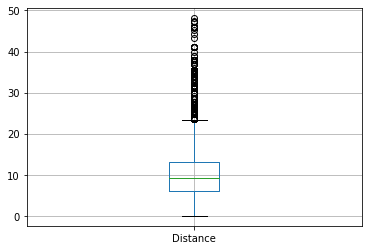

Median = 9.2
IQR = 6.9
Jumlah Outlier = 411
Outlier = [35.2, 25.0, 34.7, 24.7, 24.7, 24.7, 25.9, 38.0, 36.9, 38.0, 45.9, 32.3, 45.2, 25.2, 25.2, 31.7, 31.7, 25.9, 25.9, 34.1, 34.1, 23.8, 23.5, 35.4, 34.7, 31.7, 31.7, 31.7, 27.0, 25.5, 25.5, 27.2, 27.0, 25.0, 25.0, 25.0, 25.0, 31.2, 31.2, 31.2, 31.2, 27.0, 27.0, 24.7, 24.7, 24.7, 28.8, 24.8, 24.8, 38.0, 36.9, 32.3, 25.2, 31.7, 29.8, 31.7, 26.5, 26.5, 23.5, 35.4, 31.7, 31.7, 35.2, 34.9, 34.9, 24.7, 24.7, 24.8, 45.9, 32.3, 41.0, 31.7, 29.8, 25.9, 25.9, 26.5, 26.5, 23.5, 23.5, 35.4, 34.7, 31.7, 39.8, 35.2, 31.2, 27.0, 24.7, 38.0, 38.0, 38.0, 38.0, 25.2, 31.7, 29.8, 29.8, 31.6, 34.1, 47.3, 47.4, 23.5, 34.7, 35.4, 34.6, 31.7, 35.2, 35.2, 34.9, 27.1, 24.7, 24.7, 27.7, 27.0, 27.0, 24.8, 24.8, 38.0, 38.0, 38.0, 38.0, 33.3, 25.2, 31.7, 29.8, 31.7, 35.4, 34.6, 31.7, 29.3, 25.5, 37.5, 35.2, 35.2, 25.0, 25.0, 34.9, 34.7, 24.7, 24.7, 24.7, 27.0, 24.8, 24.8, 38.0, 38.0, 32.3, 33.3, 33.3, 26.0, 31.7, 31.7, 29.8, 28.8, 26.5, 23.5, 23.5, 35.4, 31.7, 31.

In [18]:
df.boxplot(['Distance'])
plt.savefig('Distance Boxplot.png')
plt.show()

print("Median =", df['Distance'].describe()['50%'])
print("IQR =", (df['Distance'].describe()['75%']) - (df['Distance'].describe()['25%']))
print("Jumlah Outlier =", len(find_outlier(df['Distance'])))
print("Outlier =", find_outlier(df['Distance']))



## 3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column Landsize & YearBuilt. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

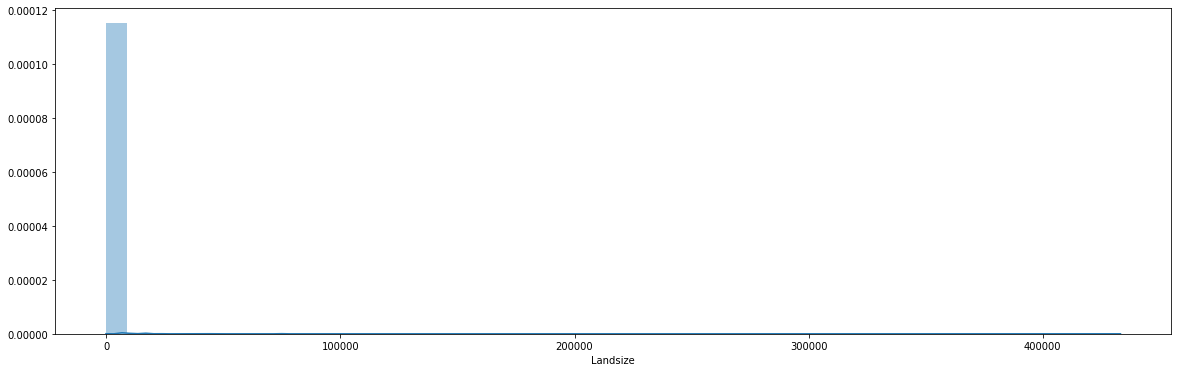

In [25]:
plt.figure(figsize = (20,6))
sns.distplot(df['Landsize'])
plt.savefig('Landsize Distribution.png')

### Lebih banyak yang luas tanahnya kecil daripada yang besar.

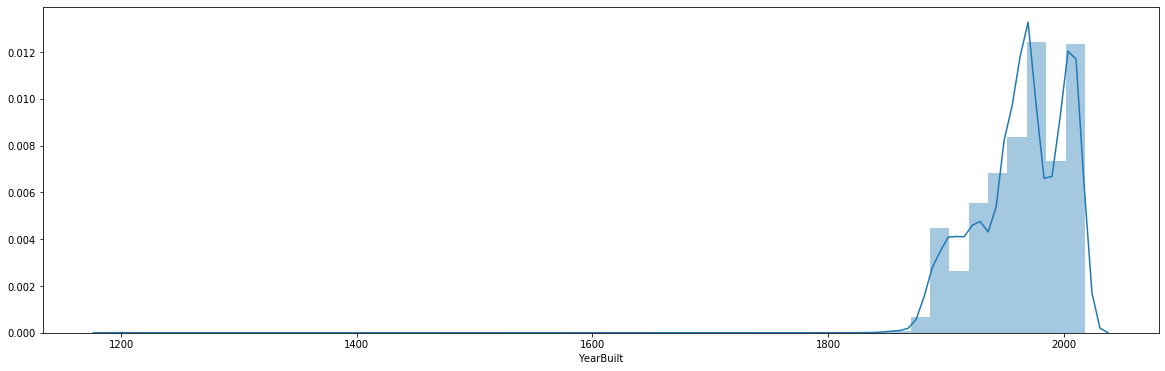

In [26]:
plt.figure(figsize = (20,6))
sns.distplot(df['YearBuilt'])
plt.savefig('YearBuilt Distribution.png')

### Jumlah rumah yang didirikan di atas tahun 1800 lebih banyak dari tahun sebelum 1800 dan trendnya naik hingga tahun 2000.

### 4. Tampilkan perkembangan rata-rata harga (price) rumah berdasarkan tahun pembangunan rumah (Year) menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!

In [4]:
df2 = df.groupby('YearBuilt').mean()
df2 = df2.reset_index()

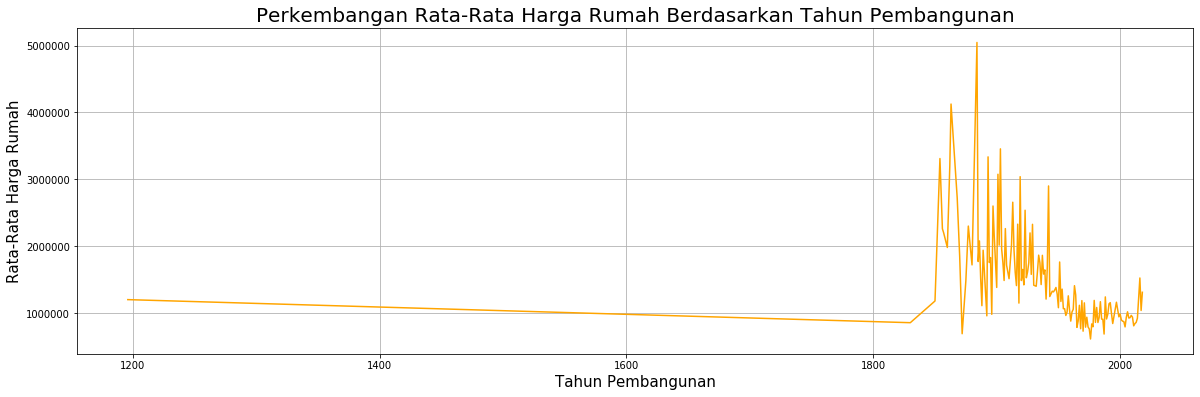

In [5]:
# membuat figure dengan ukuran tertentu
plt.figure(figsize = (20,6))

y = df2['Price']
x = df2['YearBuilt']

plt.plot(x,y,'orange')
plt.title('Perkembangan Rata-Rata Harga Rumah Berdasarkan Tahun Pembangunan', size=20)
plt.xlabel('Tahun Pembangunan', size=15)
plt.ylabel('Rata-Rata Harga Rumah', size=15)
plt.grid()
plt.savefig('Yearly Average Price.png')
plt.show()



### Berdasarkan tahun pembangunan trend rata-rata harga rumah mengalami penurunan dari jaman 1800 hingga 2000. Hal ini bisa terjadi karena semakin banyak supply namun demand semakin menurun. Sebaiknya perlu dievaluasi lagi target pasar yang dituju memiliki kebutuhan rumah yang seperti apa sehingga bisa dieksekusi pengembangan rumah sesuai dengan kebutuhan sehingga nilai jualnya juga bisa lebih ditingkatkan.

### 5. Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

### Yang memiliki nilai korelasi tertinggi ialah Rooms. Metode Korelasi yang digunakan ialah Spearman karena data tidak terdistribusi normal dan data tidak berpasangan.

In [20]:
df[['Landsize', 'Price']].corr(method="spearman")

,Landsize,Price
Landsize,1.0000,0.3272
Price,0.3272,1.0000


In [21]:
df[['Distance', 'Price']].corr(method="spearman")

,Distance,Price
Distance,1.00000,-0.12999
Price,-0.12999,1.00000


In [22]:
df[['Rooms', 'Price']].corr(method="spearman")

,Rooms,Price
Rooms,1.000000,0.539886
Price,0.539886,1.000000


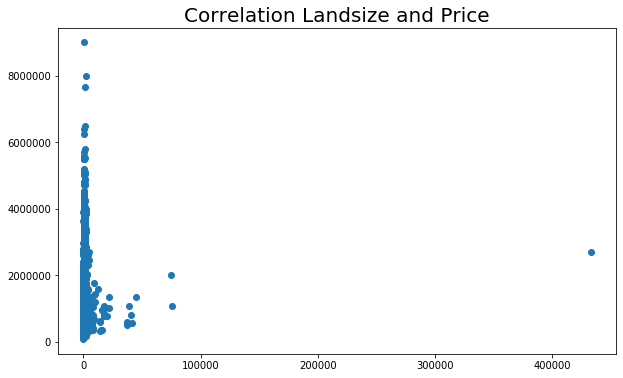

In [23]:
plt.figure(figsize = (10,6))

plt.scatter(df['Landsize'], df['Price'])
plt.title('Correlation Landsize and Price', size=20)
plt.show()

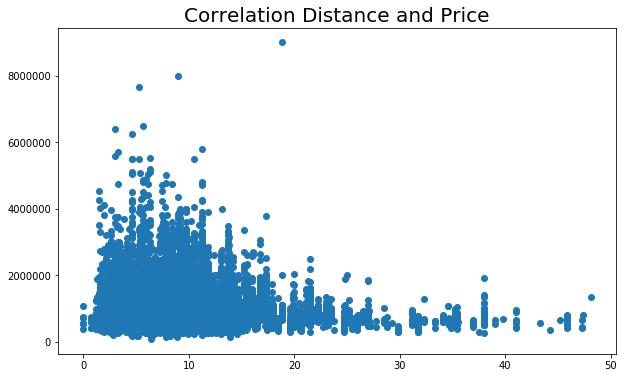

In [24]:
plt.figure(figsize = (10,6))

plt.scatter(df['Distance'], df['Price'])
plt.title('Correlation Distance and Price', size=20)
plt.show()

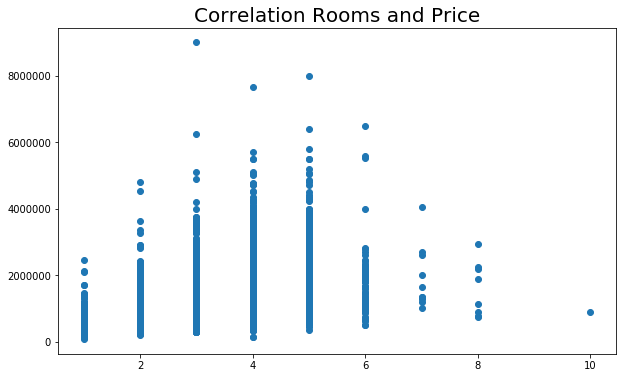

In [25]:
plt.figure(figsize = (10,6))

plt.scatter(df['Rooms'], df['Price'])
plt.title('Correlation Rooms and Price', size=20)
plt.show()